In [10]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
world_filepath = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
africa = world[world["continent"] == 'Africa']

In [103]:
africa_csv = pd.read_csv("AfricaDrought.csv")
world_csv = pd.read_csv("WorldDrought.csv")

In [104]:
affected = africa_csv.groupby(['ISO']).sum()
affected_world = world_csv.groupby(['ISO']).sum()

In [105]:
affected.reset_index(level=0, inplace=True)
affected_world.reset_index(level=0, inplace=True)

In [38]:
affected[affected['ISO'] == 'AGO']['No Affected'].values[0]

7443900.0

In [109]:
world['affected'] = 0

In [113]:
c_index = [False,False,False,False,False,False,True]
for cc in  affected_world['ISO']:
    r_index = world["iso_a3"] == cc
    world.loc[r_index,c_index] = affected_world[affected_world['ISO'] == cc]['No Affected'].values[0]
    

In [114]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,affected
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",361455.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",12737483.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",55000.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.0


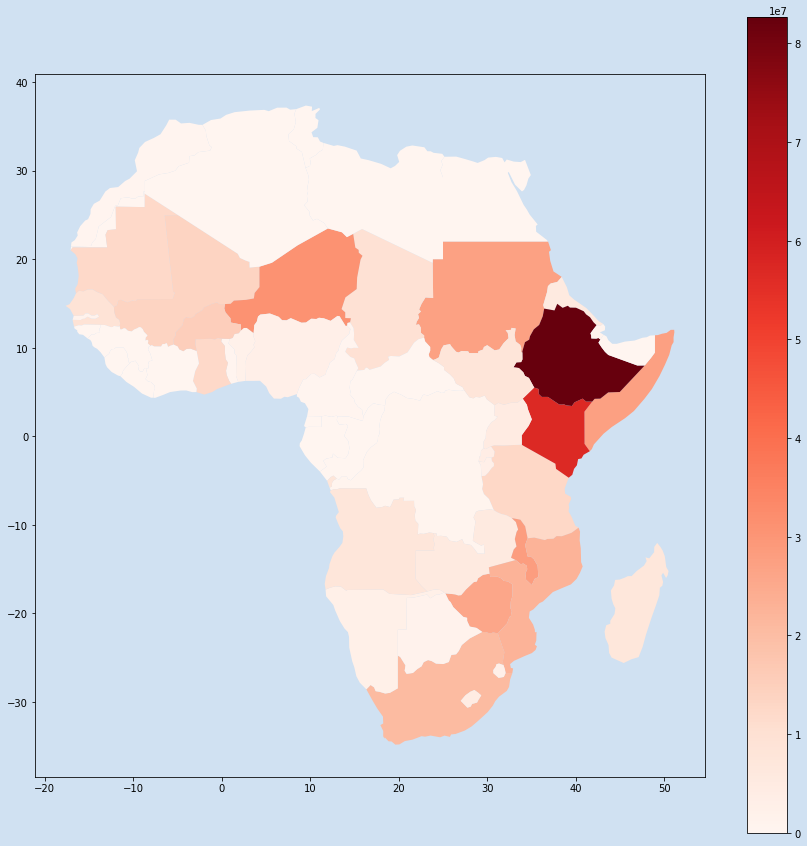

In [115]:
fig, ax = plt.subplots(figsize = (15,15), facecolor = plt.cm.Blues(.2))



ax.set_facecolor(plt.cm.Blues(.2))

ax = world[world.continent == 'Africa'].plot(

    column = 'affected',

    cmap = 'Reds',
    ax = ax,

    legend = True)


plt.show()

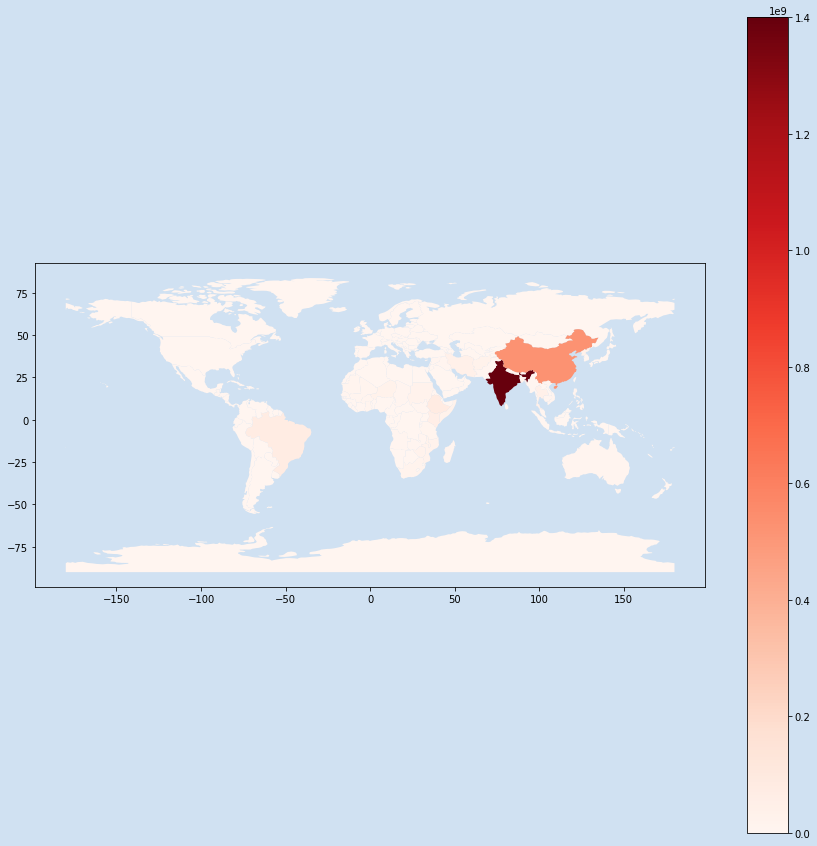

In [116]:
fig, ax = plt.subplots(figsize = (15,15), facecolor = plt.cm.Blues(.2))



ax.set_facecolor(plt.cm.Blues(.2))

ax = world.plot(

    column = 'affected',

    cmap = 'Reds',
    ax = ax,

    legend = True)


plt.show()

,affected
74,2
